In [2]:
import matplotlib.pyplot as plt
import numpy as np

import sys
import os

script_directory = os.path.abspath(os.path.join('..', 'evaluation'))
sys.path.append(script_directory)

from prediction_reader import score_result

[06:33:37] Initializing Normalizer


In [3]:
def boxplot(data, xlabel, ylabel, xticks):

    plt.figure(figsize=(10, 6))

    boxprops = dict(linestyle='-', linewidth=1, color='black', facecolor='lightblue')
    medianprops = dict(linestyle='--', linewidth=1, color='none')
    meanprops = dict(linestyle='-', linewidth=1, color='black')

    plt.boxplot(data, patch_artist=True, boxprops=boxprops, showmeans=True, meanline=True, medianprops=medianprops, meanprops=meanprops)

    # Calculating means and variances
    # means = [np.mean(d) for d in data]
    # variances = [np.var(d) for d in data]

    # Plot mean points
    # plt.scatter(range(1, len(data) + 1), means, color='orchid', zorder=3, label='Mean')

    # Add variance information as text
    # for i, (mean, var) in enumerate(zip(means, variances), start=1):
    #     plt.text(i, mean, f'var={var:.4f}', ha='center', va='bottom', fontsize=10)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(1,len(data)+1), xticks)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # plt.legend(loc='upper right')

    # Show the plot
    plt.show()

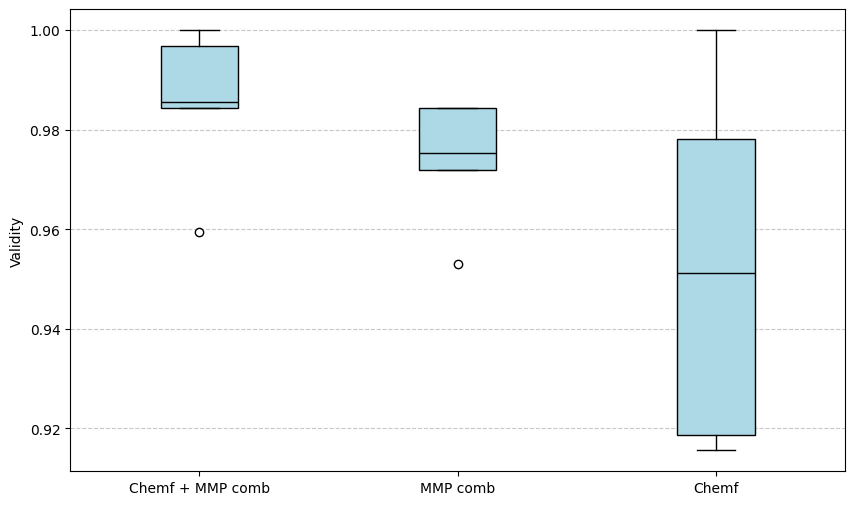

In [4]:
# Sample data (replace with your own lists)
data1 = [0.9875, 0.984375, 0.996875, 0.959375, 1.0]
data2 = [0.984375, 0.971875, 0.984375, 0.953125, 0.9826086956521739]
data3 = [0.94375, 0.915625, 0.91875, 0.978125, 1.0]

# Creating a list of datasets
data = [data1, data2, data3]

xlabel = None
ylabel = 'Validity'
xticks = ['Chemf + MMP comb', 'MMP comb', 'Chemf']
boxplot(data, xlabel, ylabel, xticks)

In [37]:
def multi_boxplot(data, xlabel, ylabel, xticks, labels, location, save_figure=None):
    

    plt.rcParams.update({'font.size': 12, 'font.family': 'sans-serif'})

    plt.figure(figsize=(12, 6))

    colour_scheme = ['lightblue', 'orange', 'mediumseagreen', 'orchid']

    # Set the width of each box
    box_width = 0.2

    for i in range(len(data)):
        boxprops = dict(linestyle='-', linewidth=1, color='black', facecolor=colour_scheme[i])
        medianprops = dict(linestyle='--', linewidth=1, color='none')
        meanprops = dict(linestyle='-', linewidth=1, color='black')

        plt.boxplot(data[i], positions=np.arange(len(data[i])) + i * box_width, widths=box_width, patch_artist=True,
                    boxprops=boxprops, showmeans=True, meanline=True, medianprops=medianprops, meanprops=meanprops, label=labels[i])
    

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    central_positions = np.arange(len(data[0])) + (len(data) * box_width / 2) - (box_width / 2)
    plt.xticks(central_positions, xticks)

    # plt.ylim(-0.005, 0.2)
    
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    if location is not None:
        plt.legend(loc=location)

    if save_figure is not None:
        os.makedirs('figures', exist_ok=True)
        plt.savefig(f'figures/{save_figure}.eps', format='eps')

    
    plt.show()


In [22]:
bs = 4

recall_comb, precision_comb, score1_comb, score_all_comb = score_result('/projects/cc/se_users/larsson_kbvs588/test/MasterThesis/evaluation/result/result_chemf_mmp_comb.csv', 10, 0, bs, False)
recall_aug, precision_aug, score1_aug, score_all_aug = score_result('/projects/cc/se_users/larsson_kbvs588/test/MasterThesis/evaluation/result/result_chemf_mmp_aug.csv', 10, 0, bs, False)
recall_base, precision_base, score1_base, score_all_base = score_result('/projects/cc/se_users/larsson_kbvs588/test/MasterThesis/evaluation/result/result_chemf_mmp_base.csv', 10, 0, bs, False)
recall_mask, precision_mask, score1_mask, score_all_mask = score_result('/projects/cc/se_users/larsson_kbvs588/test/MasterThesis/evaluation/result/result_chemf_mmp_mask.csv', 10, 0, bs, False)

[[0.10810810810810811, 0.10526315789473684, 0.05405405405405406, 0.02702702702702703], [0.06306306306306306, 0.08771929824561403, 0.04504504504504504, 0.018691588785046728], [0.043478260869565216, 0.06382978723404255, 0.03910614525139665, 0.011560693641618497], [0.02857142857142857, 0.039735099337748346, 0.03125, 0.007067137809187279]]


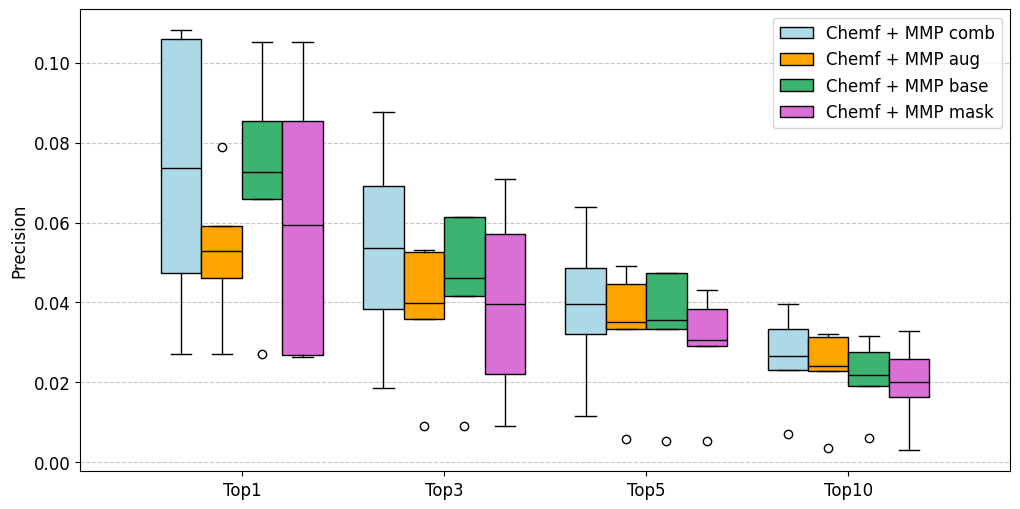

In [38]:
data = [precision_comb, precision_aug, precision_base, precision_mask]

print(precision_comb)

xlabel = None
ylabel = 'Precision'
xticks = ['Top1', 'Top3', 'Top5', 'Top10']
labels = ['Chemf + MMP comb', 'Chemf + MMP aug', 'Chemf + MMP base', 'Chemf + MMP mask']

multi_boxplot(data, xlabel, ylabel, xticks, labels, 'upper right')

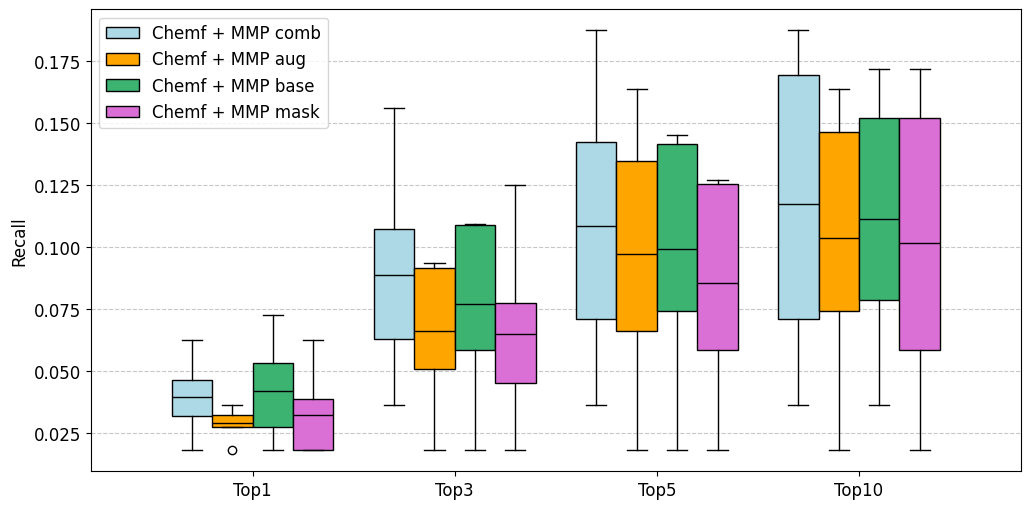

In [24]:
data = [recall_comb, recall_aug, recall_base, recall_mask]

xlabel = None
ylabel = 'Recall'
xticks = ['Top1', 'Top3', 'Top5', 'Top10']
labels = ['Chemf + MMP comb', 'Chemf + MMP aug', 'Chemf + MMP base', 'Chemf + MMP mask']

multi_boxplot(data, xlabel, ylabel, xticks, labels, 'upper left')

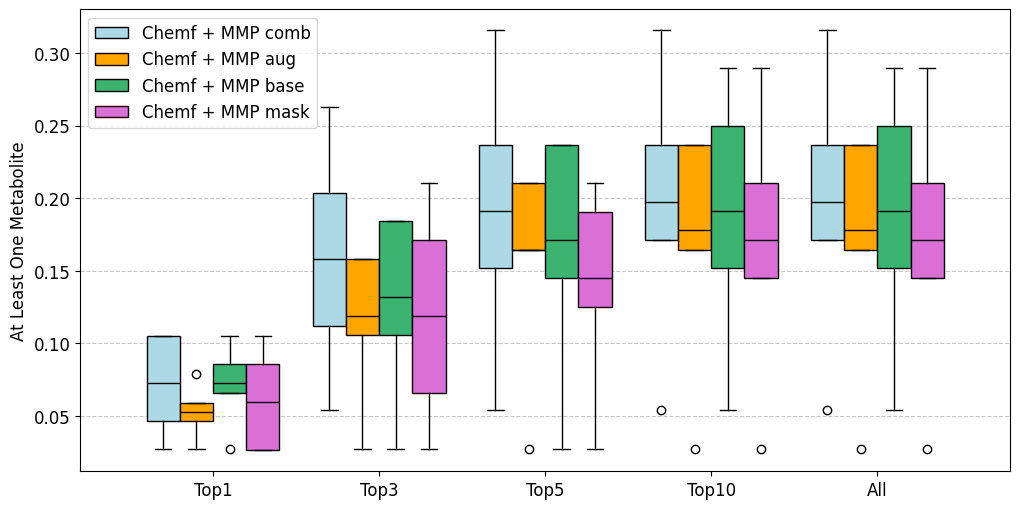

In [25]:
data = [score1_comb, score1_aug, score1_base, score1_mask]

xlabel = None
ylabel = 'At Least One Metabolite'
xticks = ['Top1', 'Top3', 'Top5', 'Top10', 'All']
labels = ['Chemf + MMP comb', 'Chemf + MMP aug', 'Chemf + MMP base', 'Chemf + MMP mask']

multi_boxplot(data, xlabel, ylabel, xticks, labels, 'upper left')

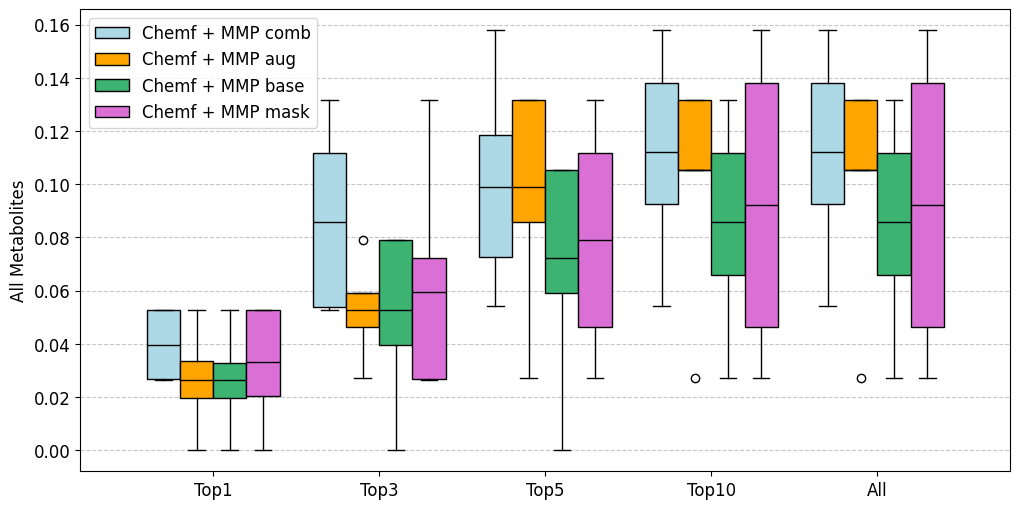

In [26]:
data = [score_all_comb, score_all_aug, score_all_base, score_all_mask]

xlabel = None
ylabel = 'All Metabolites'
xticks = ['Top1', 'Top3', 'Top5', 'Top10', 'All']
labels = ['Chemf + MMP comb', 'Chemf + MMP aug', 'Chemf + MMP base', 'Chemf + MMP mask']

multi_boxplot(data, xlabel, ylabel, xticks, labels, 'upper left')

In [27]:
bs = 5

recall_e1, precision_e1, score1_e1, score_all_e1 = score_result('/projects/cc/se_users/larsson_kbvs588/test/MasterThesis/evaluation/ensemble/result_split1_v0_mc_aug_10.csv', 10, 0, bs, False)
recall_e2, precision_e2, score1_e2, score_all_e2 = score_result('/projects/cc/se_users/larsson_kbvs588/test/MasterThesis/evaluation/ensemble/result_split2_v0_mc_aug_10.csv', 10, 0, bs, False)
recall_e3, precision_e3, score1_e3, score_all_e3 = score_result('/projects/cc/se_users/larsson_kbvs588/test/MasterThesis/evaluation/ensemble/result_split3_v0_mc_aug_10.csv', 10, 0, bs, False)
recall_e4, precision_e4, score1_e4, score_all_e4 = score_result('/projects/cc/se_users/larsson_kbvs588/test/MasterThesis/evaluation/ensemble/result_split4_v0_mc_aug_10.csv', 10, 0, bs, False)

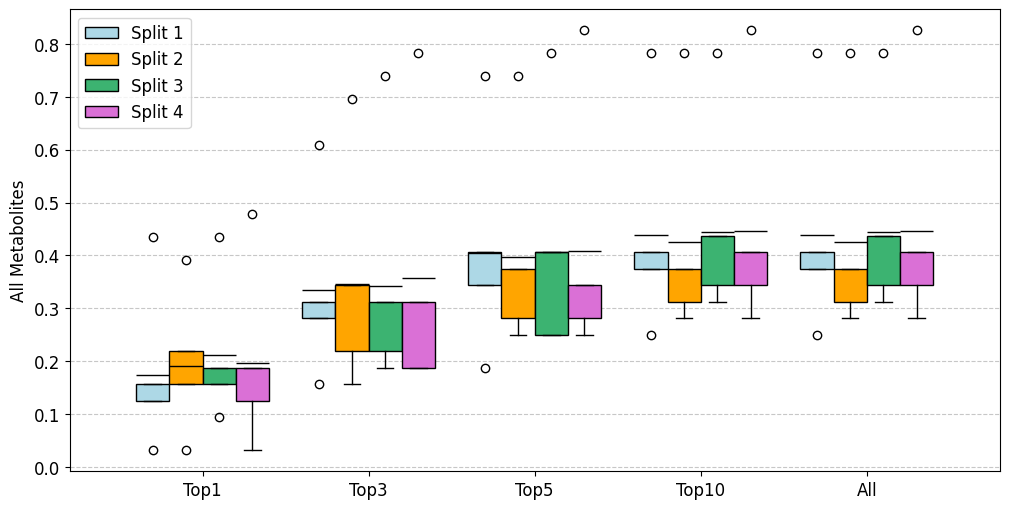

In [28]:
data = [score_all_e1, score_all_e2, score_all_e3, score_all_e4]

xlabel = None
ylabel = 'All Metabolites'
xticks = ['Top1', 'Top3', 'Top5', 'Top10', 'All']
labels = ['Split 1', 'Split 2', 'Split 3', 'Split 4']

multi_boxplot(data, xlabel, ylabel, xticks, labels, 'upper left')

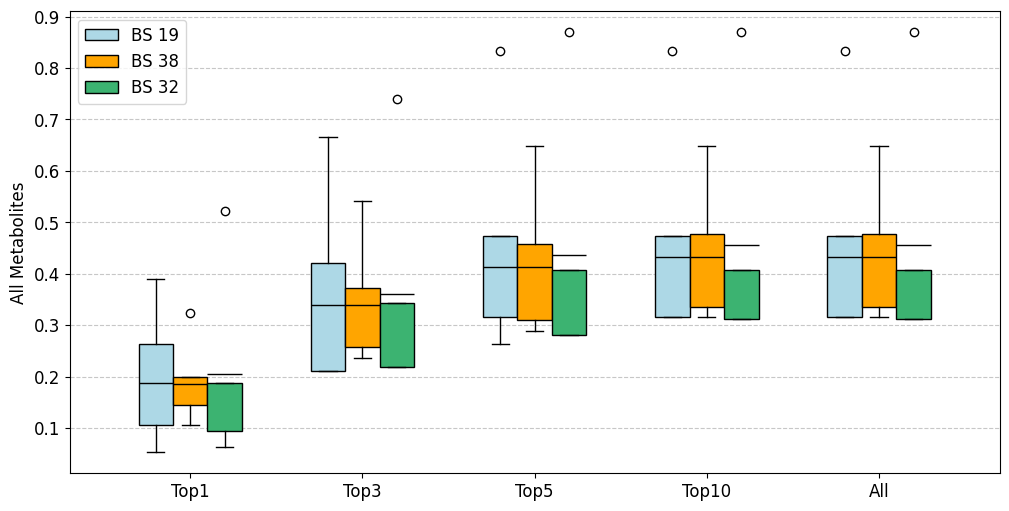

In [29]:
_, _, bs32_one, bs32_all = score_result('/projects/cc/se_users/larsson_kbvs588/test/MasterThesis/evaluation/result/result_version44_chemf_mmp_comb_0.5.csv', 10, 0, 5, False)
recall_bs19, precision_bs19, score1_bs19, score_all_bs19 = score_result('/projects/cc/se_users/larsson_kbvs588/test/MasterThesis/evaluation/result/result_test_bs19.csv', 10, 0, 8, False)
recall_bs38, precision_bs38, score1_bs38, score_all_bs38 = score_result('/projects/cc/se_users/larsson_kbvs588/test/MasterThesis/evaluation/result/result_test_bs38.csv', 10, 0, 4, False)

data = [score_all_bs19, score_all_bs38, bs32_all]

xlabel = None
ylabel = 'All Metabolites'
xticks = ['Top1', 'Top3', 'Top5', 'Top10', 'All']
labels = ['BS 19', 'BS 38', 'BS 32']

multi_boxplot(data, xlabel, ylabel, xticks, labels, 'upper left')